<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt


(-0.5, 639.5, 426.5, -0.5)

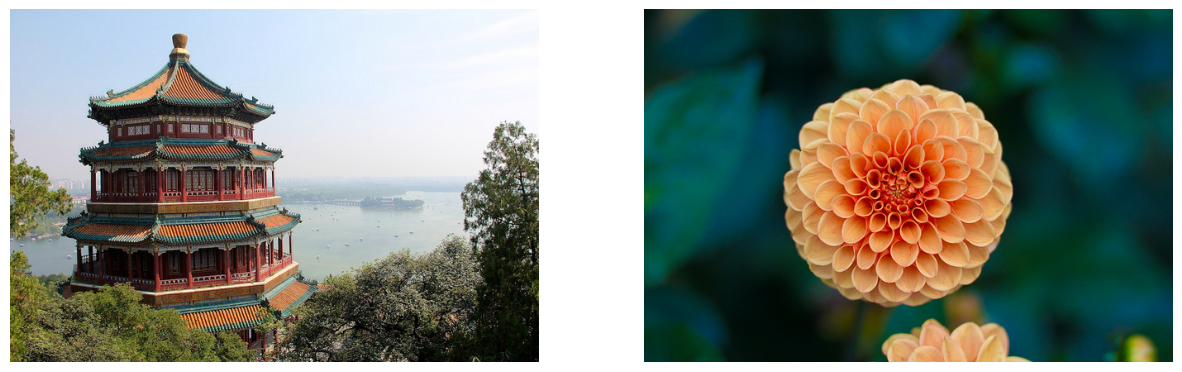

In [ ]:
images = load_sample_images()['images']
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')

(-0.5, 119.5, 69.5, -0.5)

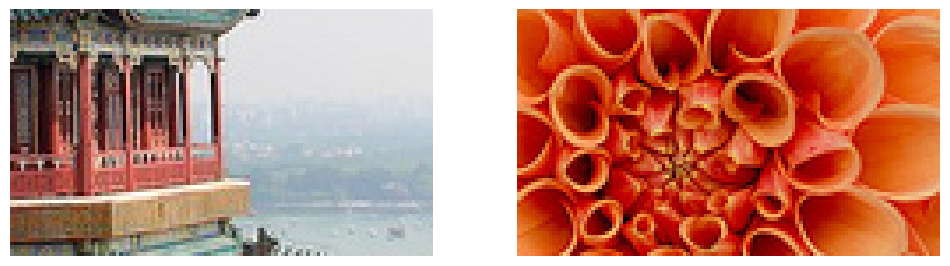

In [ ]:
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1/255)(images)
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

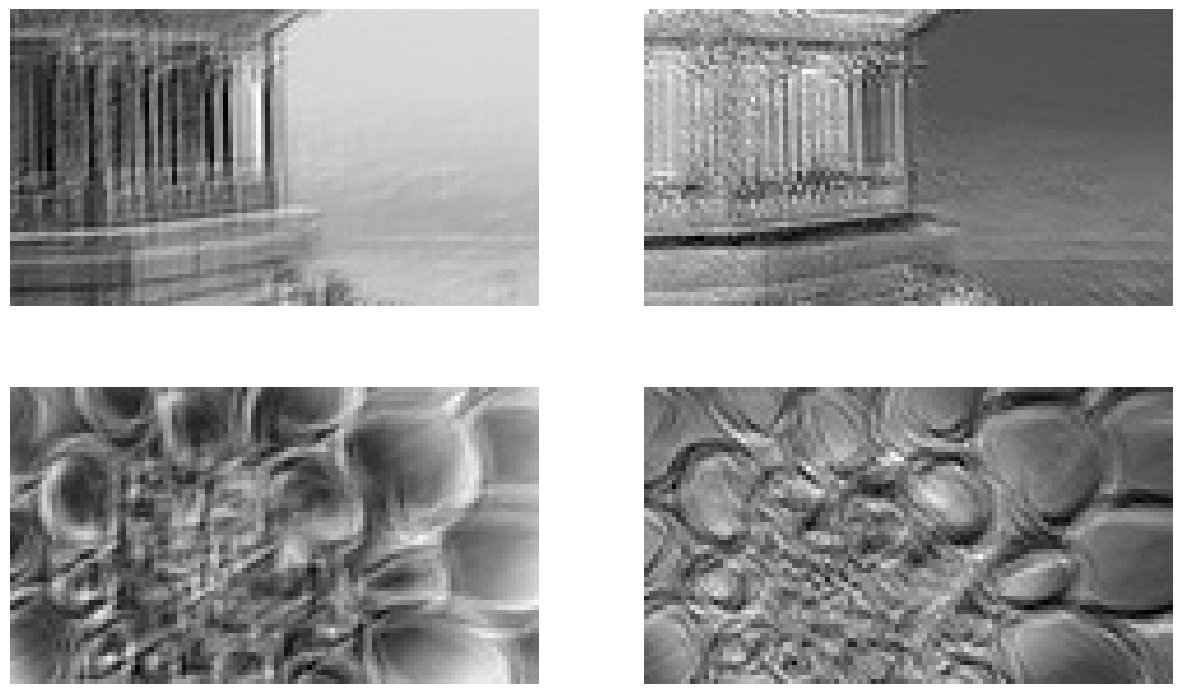

In [ ]:
plt.figure(figsize=(15,9))
for image_idx in  (0,1):
    for fmap_idx in (0,1):
      plt.subplot(2,2 ,image_idx * 2 + fmap_idx + 1)
      plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap = 'gray')
      plt.axis("off")

plt.show()

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters = 32, kernel_size=7,
                                    padding="same")
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding = "same",
                                    strides=2)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
import numpy as np

def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
    if padding=="valid":
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded

conv_output_size(np.array([70, 120]), kernel_size=10, strides=4, padding="same")

(array([18, 30]), array([8, 6]))

In [ ]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
tf.random.set_seed(42)
filters = tf.random.normal([7,7,3,2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME")+ biases

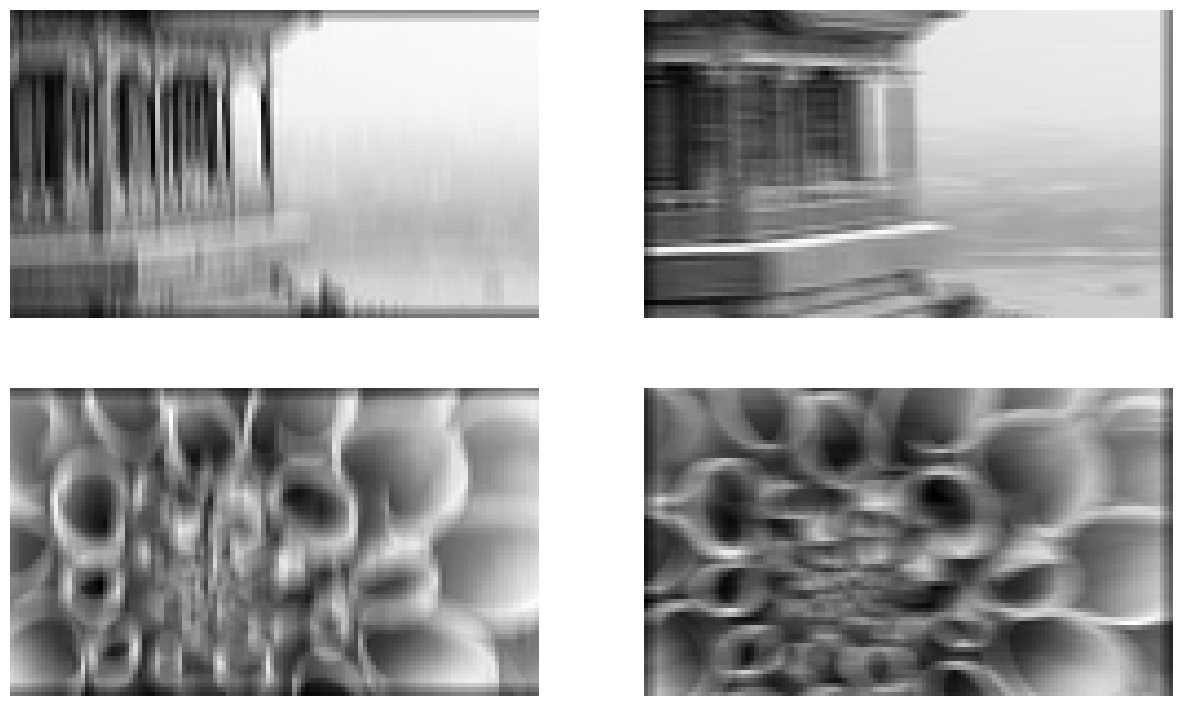

In [ ]:
plt.figure(figsize=(15,9))
filters = np.zeros([7,7,3,2])
filters[:,3, :, 0] = 1
filters[3,:,:,1]=1
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2, image_idx*2+fmap_idx + 1)
    plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
    plt.axis("off")

plt.show()

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)


In [ ]:
output = max_pool(images)

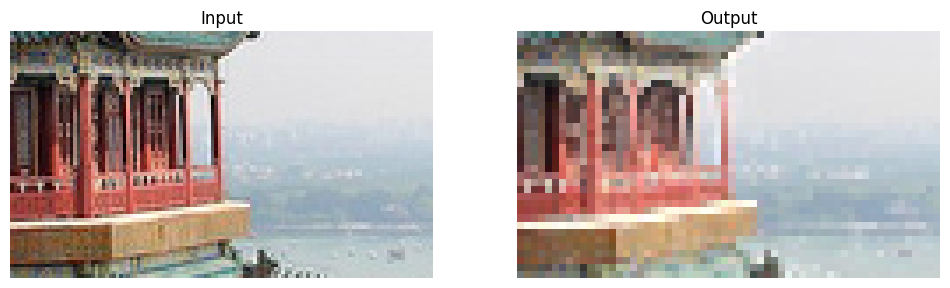

In [ ]:
import matplotlib as mpl
fig = plt.figure(figsize=(12,8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios = [2,2])

ax1 = fig.add_subplot(gs[0,0])
ax1.set_title("Input")
ax1.imshow(images[0])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title("Output")
ax2.imshow(output[0])
ax2.axis('off')
plt.show()

#class DepthPool

In [ ]:
class DepthPool(tf.keras.layers.Layer):
  def __init__(self, pool_size=2, **kwargs):
    super().__init__(**kwargs)
    self.pool_size = pool_size


  def call(self, inputs):
    shape = tf.shape(inputs)
    groups = shape[-1] // self.pool_size
    new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
    return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

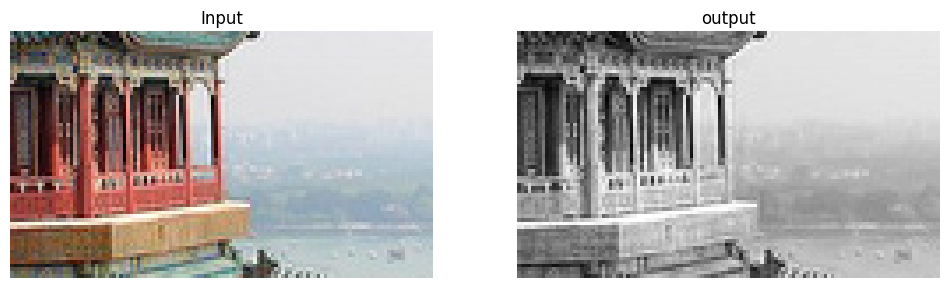

In [ ]:
depth_output =  DepthPool(pool_size=3)(images)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Input')
plt.imshow(images[0])
plt.axis('off')
plt.subplot(1,2,2)
plt.title('output')
plt.imshow(images[0, ... ,0], cmap="gray")
plt.axis("off")
plt.show()

#CNN architectures

#Tackling Fashion MNIST With a CNN

In [ ]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from functools import partial

tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3,padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28,28,1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(x_new)

Epoch 1/10
  37/1719 [..............................] - ETA: 12:19 - loss: 2.3102 - accuracy: 0.1596

In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [2]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

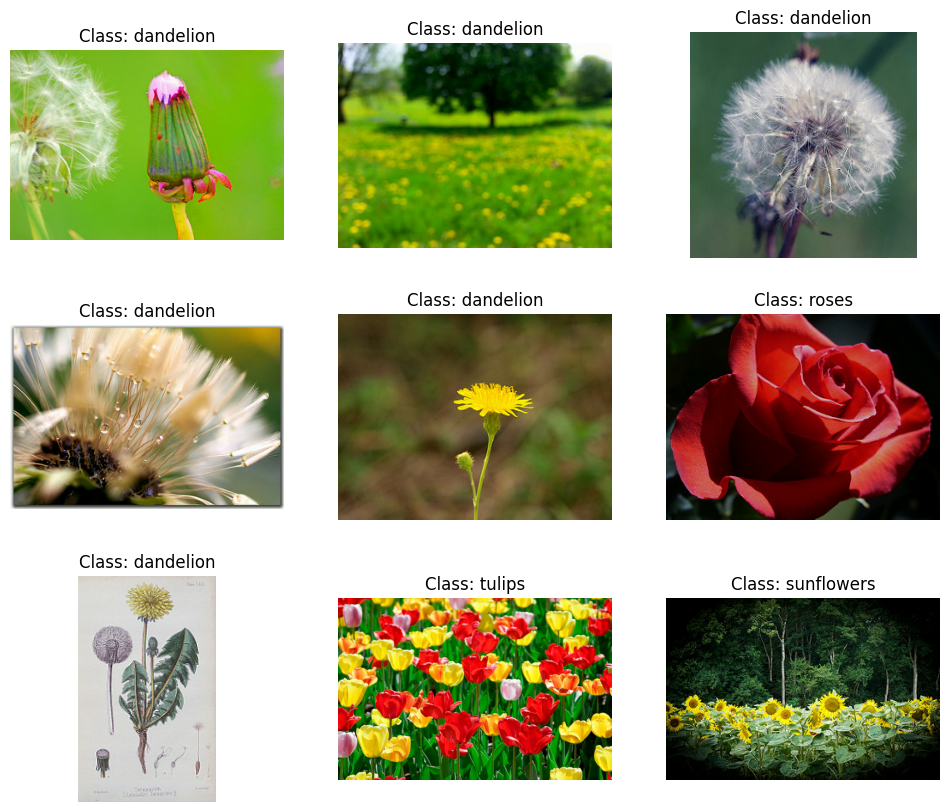

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
index = 0
for image, label in valid_set_raw.take(9):
  index +=1
  plt.subplot(3,3,index)
  plt.imshow(image)
  plt.title(f"Class: {class_names[label]}")
  plt.axis("off")

plt.show()

In [9]:
import tensorflow as tf
tf.keras.backend.clear_session()


batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set_raw.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

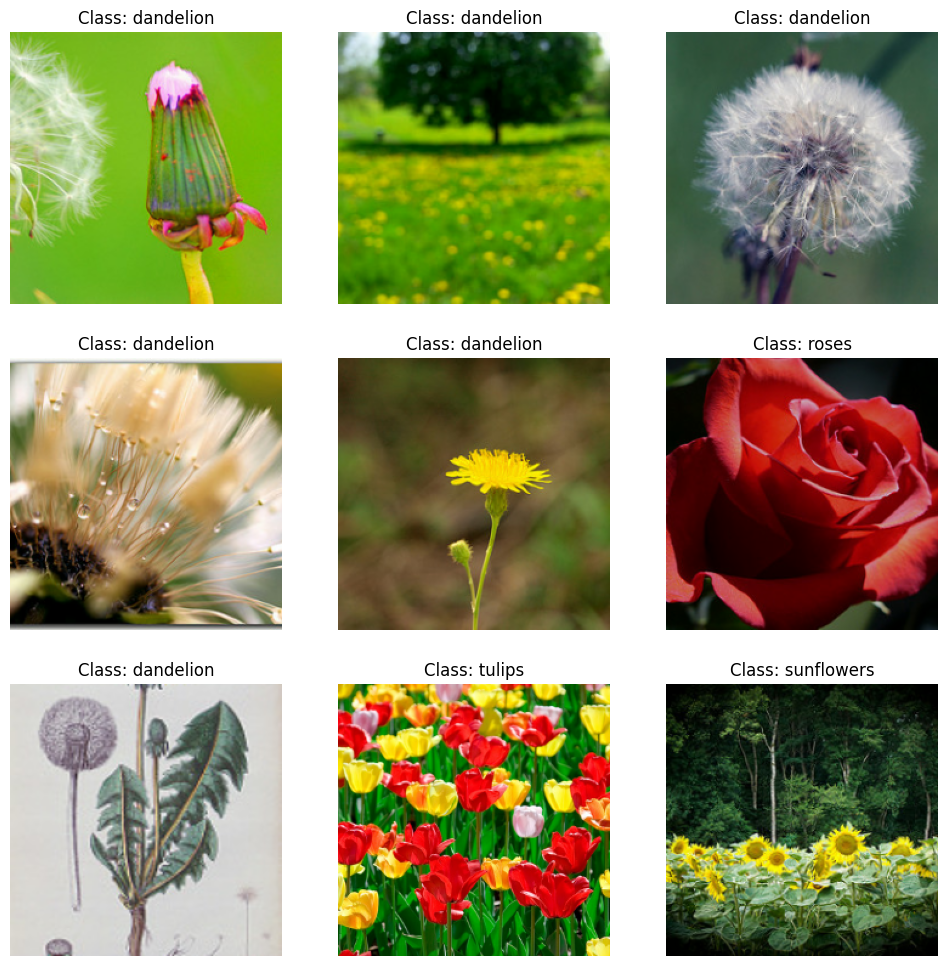

In [10]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
  for index in range(9):
    plt.subplot(3, 3, index + 1)
    plt.imshow((X_batch[index] + 1) / 2)
    plt.title(f'Class: {class_names[y_batch[index]]}')
    plt.axis('off')

plt.show()